# SGD With Momentum in Pytorch


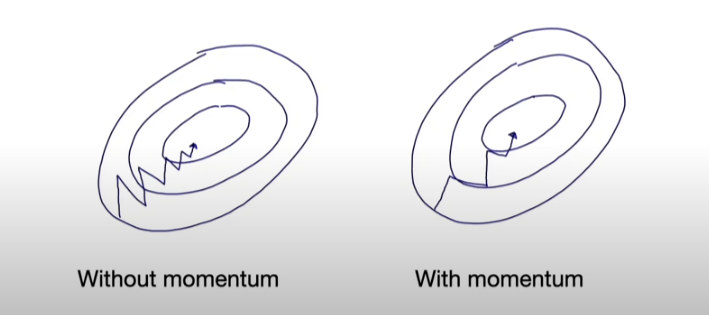

In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import grad
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/content/linreg-data.csv', index_col=0)

X = torch.tensor(df[['x1', 'x2']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.float)

torch.manual_seed(123)

shuffle_idx=torch.randperm(X.shape[0],dtype=torch.long)

X=X[shuffle_idx]
y=y[shuffle_idx]

percent70=int(X.shape[0]*0.7)

X_train=X[:percent70]
y_train=y[:percent70]

X_test=X[percent70:]
y_test=y[percent70:]

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

 Below is an implementation of Linear Regression where we have used SGD without momentum

In [3]:
class LinearRegression01(torch.nn.Module):

  def __init__(self,num_features):
    super(LinearRegression01, self).__init__()
    self.linear = torch.nn.Linear(num_features, 1)


    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()


  def forward(self,X):

    return self.linear(X).reshape(-1)

  def train(self,X,y,epochs,lr=0.01,minibatch_size=10):

    torch.manual_seed(120)
    loss=[]
    optimizer = torch.optim.SGD(self.parameters(), lr=lr)

    for epoch in range(epochs):
      shuffle_idx=torch.randperm(X.shape[0],dtype=torch.long)
      minibatch_indices=torch.split(shuffle_idx,minibatch_size)
      for minibatch_idx in minibatch_indices:
        y_pred=self.forward(X[minibatch_idx])
        mse=F.mse_loss(y_pred, y[minibatch_idx])

        optimizer.zero_grad()
        mse.backward()
        optimizer.step()

      with torch.no_grad():

        preds=self.forward(X)
        curr_loss=torch.mean((y-preds)**2)
        print(f'Epoch: {epoch+1}, Loss: {curr_loss}')
        loss.append(curr_loss)
    return loss

## Below is an implementation of Linear Regression with Momentum

The main idea behind this implementation is:  
**"Not only move in the opposite direction of the gradient but also move in the averaged direction of the past updates."**

In simple terms, we combine the gradient descent direction with the momentum of past gradients, leading to a smoother update and potentially faster convergence.

### Key Concepts:
- **v** is the **velocity term** which accumulates the past gradients. It helps retain memory of previous updates, allowing the model to accelerate in directions where gradients have been consistently pointing.
  
- **beta** is the **momentum coefficient**, which controls how much of the past gradient is retained. The larger the beta, the more momentum is retained, making the optimizer more aggressive in moving in the direction of previous gradients.

### Equations:
1. **Velocity Update**:

   v_w = beta * v_w + lr * grad_w  
   v_b = beta * v_b + lr * grad_b  

   Where:
   - v_w, v_b are the velocities for the weights and bias.
   - beta is the momentum coefficient.
   - lr is the learning rate.
   - grad_w, grad_b are the gradients of the loss with respect to weights and bias.

2. **Parameter Update**:

   w = w - v_w  
   b = b - v_b  

   Where:
   - w, b are the weight and bias parameters.


In [4]:
class LinearRegression02(torch.nn.Module):

  def __init__(self,num_features):
    super(LinearRegression02, self).__init__()
    self.linear = torch.nn.Linear(num_features, 1)

    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()


  def forward(self,X):

    return self.linear(X).reshape(-1)

  def train(self,X,y,epochs,lr=0.01,minibatch_size=10,beta=0.9):
    torch.manual_seed(120)
    loss=[]

    v_b = torch.zeros_like(self.linear.bias)
    v_w = torch.zeros_like(self.linear.weight)
    for epoch in range(epochs):
      shuffle_idx=torch.randperm(X.shape[0],dtype=torch.long)
      minibatch_indices=torch.split(shuffle_idx,minibatch_size)
      for minibatch_idx in minibatch_indices:
        y_pred=self.forward(X[minibatch_idx])
        mse=F.mse_loss(y_pred, y[minibatch_idx])
        grad_w=grad(mse,self.linear.weight,retain_graph=True)[0]
        grad_b=grad(mse,self.linear.bias)[0]
        v_w=beta*v_w+lr*grad_w
        v_b=beta*v_b+lr*grad_b
        with torch.no_grad():
            self.linear.weight -= v_w
            self.linear.bias -= v_b
        self.linear.zero_grad()
      with torch.no_grad():
        preds=self.forward(X)
        epoch_loss=F.mse_loss(preds, y)
        print(f'Epoch: {epoch+1}, Loss: {epoch_loss}')
        loss.append(epoch_loss)
    return loss






In [6]:
linear_regression_without_momentum=LinearRegression01(num_features=X.shape[1])
loss_without_momentum=linear_regression_without_momentum.train(X_train,y_train,100,lr=0.01)

Epoch: 1, Loss: 472.7065734863281
Epoch: 2, Loss: 388.48199462890625
Epoch: 3, Loss: 384.5899963378906
Epoch: 4, Loss: 384.4708557128906
Epoch: 5, Loss: 384.50311279296875
Epoch: 6, Loss: 384.38348388671875
Epoch: 7, Loss: 384.35626220703125
Epoch: 8, Loss: 384.7010192871094
Epoch: 9, Loss: 384.4432678222656
Epoch: 10, Loss: 384.4690246582031
Epoch: 11, Loss: 384.48358154296875
Epoch: 12, Loss: 384.4710388183594
Epoch: 13, Loss: 384.39892578125
Epoch: 14, Loss: 384.427490234375
Epoch: 15, Loss: 384.5412902832031
Epoch: 16, Loss: 384.3504943847656
Epoch: 17, Loss: 384.3441467285156
Epoch: 18, Loss: 384.38262939453125
Epoch: 19, Loss: 384.57110595703125
Epoch: 20, Loss: 384.4284973144531
Epoch: 21, Loss: 384.5216979980469
Epoch: 22, Loss: 384.5309753417969
Epoch: 23, Loss: 384.79119873046875
Epoch: 24, Loss: 384.43328857421875
Epoch: 25, Loss: 384.3867492675781
Epoch: 26, Loss: 384.6307067871094
Epoch: 27, Loss: 384.42572021484375
Epoch: 28, Loss: 384.56976318359375
Epoch: 29, Loss: 384.

In [7]:
linear_regression_with_momentum=LinearRegression02(num_features=X.shape[1])
loss_with_momentum=linear_regression_with_momentum.train(X_train,y_train,100,lr=0.001)

Epoch: 1, Loss: 468.489501953125
Epoch: 2, Loss: 385.3152770996094
Epoch: 3, Loss: 384.5489196777344
Epoch: 4, Loss: 384.521240234375
Epoch: 5, Loss: 384.4755859375
Epoch: 6, Loss: 384.3418273925781
Epoch: 7, Loss: 384.35577392578125
Epoch: 8, Loss: 384.4064636230469
Epoch: 9, Loss: 384.4483337402344
Epoch: 10, Loss: 384.4725036621094
Epoch: 11, Loss: 384.4903259277344
Epoch: 12, Loss: 384.3460693359375
Epoch: 13, Loss: 384.3332214355469
Epoch: 14, Loss: 384.3768615722656
Epoch: 15, Loss: 384.5962829589844
Epoch: 16, Loss: 384.3857727050781
Epoch: 17, Loss: 384.3851013183594
Epoch: 18, Loss: 384.5047912597656
Epoch: 19, Loss: 384.4001770019531
Epoch: 20, Loss: 384.36968994140625
Epoch: 21, Loss: 384.4172668457031
Epoch: 22, Loss: 384.6037902832031
Epoch: 23, Loss: 384.56451416015625
Epoch: 24, Loss: 384.66888427734375
Epoch: 25, Loss: 384.3496398925781
Epoch: 26, Loss: 384.3739318847656
Epoch: 27, Loss: 384.53070068359375
Epoch: 28, Loss: 384.33441162109375
Epoch: 29, Loss: 384.4487915

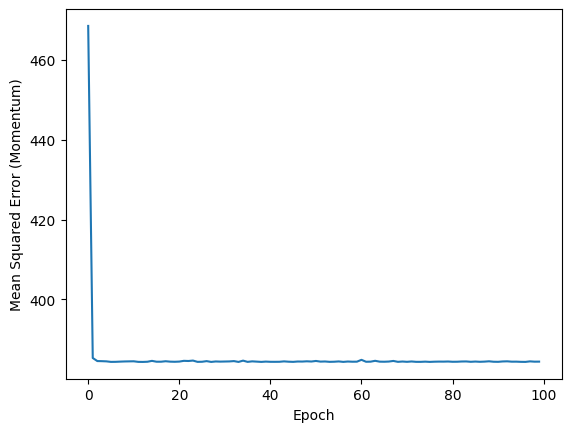

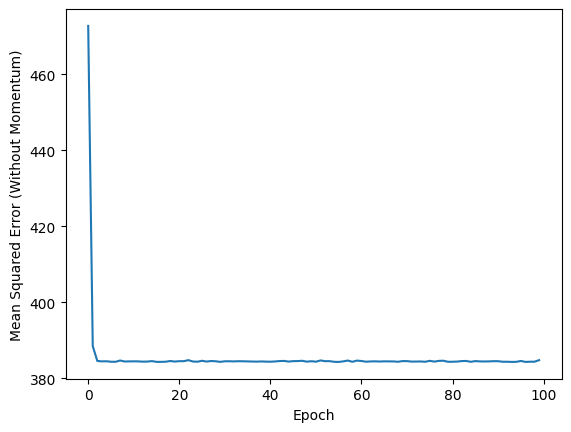

In [8]:
plt.plot(range(len(loss_with_momentum)), loss_with_momentum)
plt.ylabel('Mean Squared Error (Momentum)')
plt.xlabel('Epoch')
plt.show()



plt.plot(range(len(loss_without_momentum)), loss_without_momentum)
plt.ylabel('Mean Squared Error (Without Momentum)')
plt.xlabel('Epoch')
plt.show()